In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam
from time import time
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [ ]:
from google.colab import files  
uploaded = files.upload()

Saving Hascol_Final_data_with_infScoreV1.csv to Hascol_Final_data_with_infScoreV1.csv


In [ ]:
df = pd.read_csv("Hascol_Final_data_with_infScoreV1.csv",parse_dates=True,index_col="Date")
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Sen_score,Sen_label,Infleunce,T_id,TWITTER HANDLE,s_score_mean,s_sentiment_label,Infs_add,Infs_mean,next_day_close_price,next_day_open_price
Date,,,,,,,,,,,,,,,,,
2016-12-31,365,338.25,349.195,336.88,345.955,1359150,[],[],[],[],[],0.0,NaN,16929.945538,0.0,345.955,338.25
2017-01-01,366,338.25,349.195,336.88,345.955,1359150,[],[],[],[],[],0.0,NaN,16929.945538,0.0,354.390,339.50
2017-02-01,367,339.50,354.390,337.25,354.390,1694400,[],[],[],[],[],0.0,NaN,16929.945538,0.0,354.790,358.99
2017-03-01,368,358.99,364.000,352.00,354.790,1710500,[],[],[],[],[],0.0,NaN,16929.945538,0.0,353.970,353.32
2017-04-01,369,353.32,359.890,353.00,353.970,580300,[],[],[],[],[],0.0,NaN,16929.945538,0.0,351.040,350.98


In [ ]:
df = df[["Close", "s_score_mean", "Open", "High", "Low", "Infs_add" , "next_day_open_price"]]
df = df.dropna()
df.shape

(1095, 7)

In [ ]:
print("--scaling data---")
data = sc.fit_transform(df) 
train_ind = int(0.6*len(df))
val_ind = train_ind + int(0.2*len(df))

--scaling data---


In [ ]:
train = data[:train_ind]
val = data[train_ind:val_ind]
test = data[val_ind:]

In [ ]:
print("--shapes--")
print("train,test,val",train.shape, test.shape, val.shape)

--shapes--
train,test,val (657, 7) (219, 7) (219, 7)


In [ ]:
xtrain,ytrain,xval,yval,xtest,ytest = train[:,:6],train[:,6:7],val[:,:6],val[:,6:7],test[:,:6],test[:,6:7]

In [ ]:
lookback = 60
n_features = 6
train_len = len(xtrain) - lookback
test_len = len(xtest) - lookback
val_len = len(xval) - lookback

In [ ]:
print(xtrain)
x_train = np.zeros((train_len, lookback, n_features))
print(x_train)

[[0.88255088 0.47875233 0.86502252 0.8781121  0.86837354 0.01113158]
 [0.88255088 0.47875233 0.86502252 0.8781121  0.86837354 0.01113158]
 [0.90534879 0.47875233 0.86841391 0.89194515 0.86938563 0.01113158]
 ...
 [0.61025974 0.75099973 0.61175322 0.61637598 0.60473768 0.00173047]
 [0.62085462 0.47875233 0.61441207 0.62196778 0.61704688 0.00113381]
 [0.62171951 0.47875233 0.62776059 0.61927839 0.61978226 0.00113381]]
[[[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0.

In [ ]:
x_train = np.zeros((train_len, lookback, n_features))
y_train = np.zeros((train_len))
for i in range(train_len):
    ytemp = i+lookback
    x_train[i] = xtrain[i:ytemp]
    y_train[i] = ytrain[ytemp]
print("x_train", x_train.shape)
print("y_train", y_train.shape)

x_train (597, 60, 6)
y_train (597,)


In [ ]:
x_test = np.zeros((test_len, lookback, n_features))
y_test = np.zeros((test_len))
for i in range(test_len):
    ytemp = i+lookback
    x_test[i] = xtest[i:ytemp]
    y_test[i] = ytest[ytemp]
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_test (159, 60, 6)
y_test (159,)


In [ ]:
x_val = np.zeros((val_len, lookback, n_features))
y_val = np.zeros((val_len))
for i in range(val_len):
    ytemp = i+lookback
    x_val[i] = xval[i:ytemp]
    y_val[i] = yval[ytemp]
print("x_val", x_val.shape)
print("y_val", y_val.shape)

x_val (159, 60, 6)
y_val (159,)


In [ ]:
model = Sequential()  
model.add(LSTM(100,input_shape = (lookback, n_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           42800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 73,051
Trainable params: 73,051
Non-traina

In [ ]:
model.compile(loss = 'mse', optimizer = 'adam')
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
#model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')

In [ ]:
start = time()
print("start:",0)
history = model.fit(x_train,y_train, epochs = 10, batch_size=30, 
          validation_data=(x_val,y_val),verbose = 1, 
          shuffle = False, callbacks=[earlystop])
print("endtime:",time()-start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'Upper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


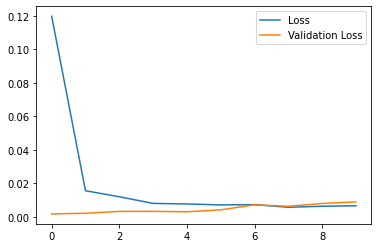

In [ ]:

loss = history.history
plt.plot(loss['loss'])
plt.plot(loss['val_loss'])
plt.legend(['Loss', 'Validation Loss'], loc='Upper right')


In [ ]:
y_pred = model.predict(x_test)
print(model.summary())

In [ ]:
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared :', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 0.09283477275043316
R-squared : -15.40538135429722


Text(0.5, 1.0, 'Hascol Stock Prediction with LSTM')

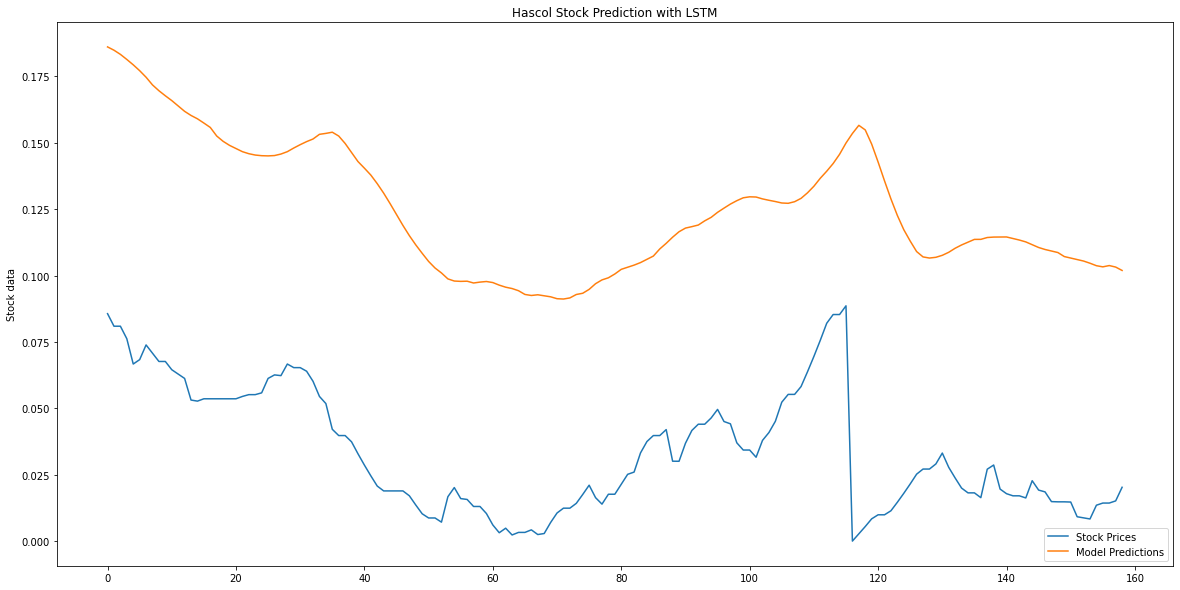

In [ ]:
plt.figure(figsize=(20,10))
plt.plot( y_test,   label='Real values')
plt.plot( y_pred,   label='Predicted values')
plt.legend(['Stock Prices', 'Model Predictions'], loc='lower right')
plt.ylabel('Stock data')
plt.title('Hascol Stock Prediction with LSTM')
#<<<<<<< HEAD
